In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --------------------------------
# 1️⃣ 데이터 불러오기
# --------------------------------
file_path = "/content/drive/MyDrive/Colab Notebooks/TSLA.csv"
df = pd.read_csv(file_path)

In [29]:

df = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# --------------------------------
# 2️⃣ 정규화 (0~1)
# --------------------------------
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [30]:
df

,Open,High,Low,Close,Adj Close
0,3.800000,5.000000,3.508000,4.778000,4.778000
1,5.158000,6.084000,4.660000,4.766000,4.766000
2,5.000000,5.184000,4.054000,4.392000,4.392000
3,4.600000,4.620000,3.742000,3.840000,3.840000
4,4.000000,4.000000,3.166000,3.222000,3.222000
...,...,...,...,...,...
2951,874.489990,907.849976,867.390015,905.390015,905.390015
2952,914.979980,942.849976,907.090027,921.159973,921.159973
2953,930.000000,997.859985,921.750000,993.979980,993.979980
2954,979.940002,1040.699951,976.400024,999.109985,999.109985


In [31]:
# --------------------------------
# 3️⃣ 시계열 데이터셋 생성
# --------------------------------
def create_dataset(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])      # 지난 30일 입력
        y.append(data[i+time_steps, 3])     # 3번째 = 'Close'
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_dataset(scaled_data, time_steps)

# 훈련/테스트 분리 (80:20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (2340, 30, 5) y_train: (2340,)
X_test: (586, 30, 5) y_test: (586,)


In [32]:
# --------------------------------
# 4️⃣ RNN 모델
# --------------------------------
rnn_model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(time_steps, X.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_history = rnn_model.fit(X_train, y_train, epochs=30, batch_size=32,
                            validation_split=0.1, verbose=1)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 5.6654e-04 - val_loss: 1.1538e-05
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.1856e-06 - val_loss: 8.1635e-06
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2211e-06 - val_loss: 7.0569e-06
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1595e-06 - val_loss: 6.5089e-06
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8702e-06 - val_loss: 8.9191e-06
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1896e-06 - val_loss: 5.0073e-06
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4138e-06 - val_loss: 5.8922e-06
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1732e-06 - val_loss: 4.4851e-06
Epoch 9/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6238e-06 - val_loss: 5.7723e-06
Epoch 10/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.7514e-06 - val_loss: 3.7282e-06
Epoch 11/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0599e-06 - val_loss: 3.942

In [33]:
# --------------------------------
# 5️⃣ LSTM 모델
# --------------------------------
lstm_model = Sequential([
    LSTM(64, activation='tanh', input_shape=(time_steps, X.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_history = lstm_model.fit(X_train, y_train, epochs=30, batch_size=32,
                              validation_split=0.1, verbose=1)


Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.4377e-04 - val_loss: 6.2694e-06
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0802e-06 - val_loss: 6.3411e-06
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.9205e-06 - val_loss: 5.9371e-06
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9258e-06 - val_loss: 6.4358e-06
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.0388e-06 - val_loss: 7.5921e-06
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.3462e-06 - val_loss: 5.1987e-06
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9935e-06 - val_loss: 4.8272e-06
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.5124e-06 - val_loss: 4.9017e-06
Epoch 9/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3634e-06 - val_loss: 5.0474e-06
Epoch 10/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3605e-06 - val_loss: 4.5053e-06
Epoch 11/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5737e-0

In [34]:
# --------------------------------
# 6️⃣ 예측 및 평가
# --------------------------------
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)

rnn_mse = mean_squared_error(y_test, rnn_pred)
lstm_mse = mean_squared_error(y_test, lstm_pred)

print(f"✅ RNN MSE: {rnn_mse:.4f}")
print(f"✅ LSTM MSE: {lstm_mse:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
✅ RNN MSE: 0.0359
✅ LSTM MSE: 0.0273


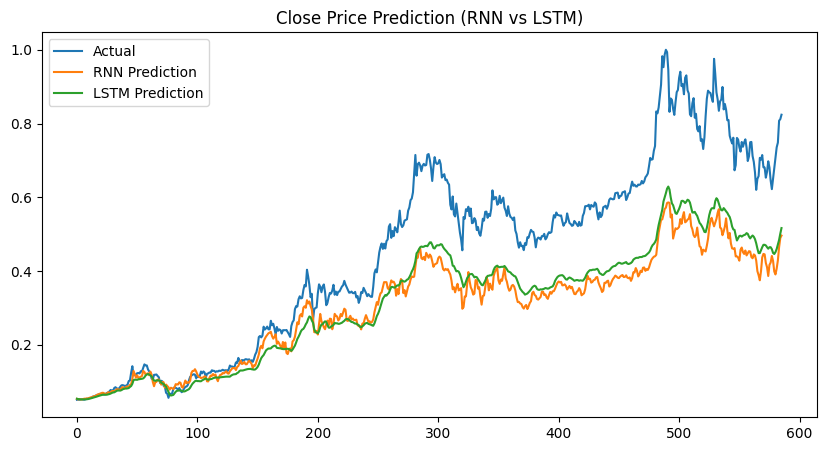

In [35]:
# --------------------------------
# 7️⃣ 시각화
# --------------------------------
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(rnn_pred, label='RNN Prediction')
plt.plot(lstm_pred, label='LSTM Prediction')
plt.legend()
plt.title("Close Price Prediction (RNN vs LSTM)")
plt.show()